In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [28]:
# Define paths

train_image_path = "dataset\\train\\images"
test_image_path = "dataset\\test\\images"
train_label_path = "dataset\\train\\labels"
test_label_path = "dataset\\test\\labels"

In [29]:
image_path = "dataset\\train\\images\\DJI_0004_03_07.png"

image = cv2.imread(image_path)

image_shape = image.shape

image_height, image_width, num_channels = image_shape

In [30]:
class_names = ["Damage/Dirt", "No Damage/Dirt"]

train_limit = 300
test_limit = 100

if not train_limit:
    train_limit = len(os.listdir(train_image_path))
    test_limit = len(os.listdir(test_image_path))


In [31]:
# Initialize array for images

train_images = np.zeros(train_limit, dtype=(np.float32, (image_height, image_width, num_channels)))
test_images = np.empty(test_limit, dtype=(np.float32, (image_height, image_width, num_channels)))


train_labels = np.zeros(train_limit)
test_labels = np.empty(test_limit)

# 0 -> No damage
# 1 -> Dirt/Damage

In [32]:
# Add train images and labels into array

for idx, image_path in enumerate(os.listdir(train_image_path)[:train_limit]):
    image = cv2.imread(os.path.join(train_image_path, image_path))
    # image = cv2.resize(image, target_image_size)
    image = image / 255.0  # Scale pixel values to [0, 1]
    train_images[idx] = image

    label_path = image_path[:-3] + "txt"

    with open(os.path.join(train_label_path, label_path), 'r') as f:
         train_labels[idx] = (f.read().strip() == class_names[1])

In [33]:
# Add test images and labels into array

for idx, image_path in enumerate(os.listdir(test_image_path)[:test_limit]):
    image = cv2.imread(os.path.join(test_image_path, image_path))
    # image = cv2.resize(image, target_image_size)
    image = image / 255.0  # Scale pixel values to [0, 1]
    test_images[idx] = image

    label_path = image_path[:-3] + "txt"

    with open(os.path.join(test_label_path, label_path), 'r') as f:
         test_labels[idx] = (f.read().strip() == class_names[1])

In [34]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Use a single unit with sigmoid activation for binary classification

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'Precision', 'Recall'])

In [35]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), batch_size=35)

Epoch 1/10
9/9 [==============================] - 20s 2s/step - loss: 3.3950 - accuracy: 0.5133 - precision: 0.5817 - recall: 0.5205 - val_loss: 0.7506 - val_accuracy: 0.5400 - val_precision: 0.5400 - val_recall: 1.0000
Epoch 2/10
9/9 [==============================] - 20s 2s/step - loss: 0.6785 - accuracy: 0.5767 - precision: 0.5743 - recall: 0.9942 - val_loss: 0.6496 - val_accuracy: 0.5900 - val_precision: 0.5684 - val_recall: 1.0000
Epoch 3/10
9/9 [==============================] - 20s 2s/step - loss: 0.6369 - accuracy: 0.6700 - precision: 0.6895 - recall: 0.7661 - val_loss: 0.6891 - val_accuracy: 0.6000 - val_precision: 0.5761 - val_recall: 0.9815
Epoch 4/10
9/9 [==============================] - 21s 2s/step - loss: 0.6316 - accuracy: 0.7067 - precision: 0.7219 - recall: 0.7895 - val_loss: 0.6134 - val_accuracy: 0.6700 - val_precision: 0.6842 - val_recall: 0.7222
Epoch 5/10
9/9 [==============================] - 19s 2s/step - loss: 0.4708 - accuracy: 0.8100 - precision: 0.8032 - re

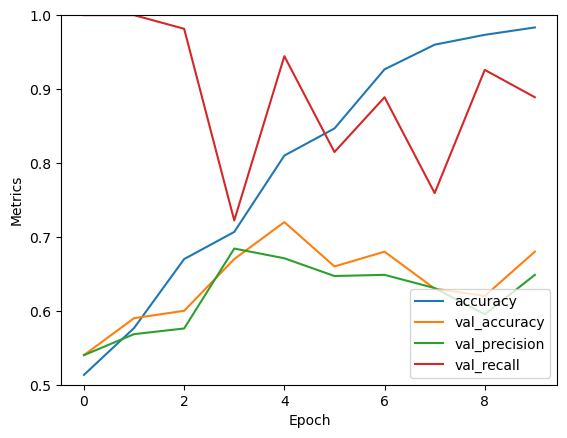

In [39]:
# Plot metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_precision'], label='val_precision')
plt.plot(history.history['val_recall'], label='val_recall')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [37]:
# Evaluate the model
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images, test_labels, verbose=2)
test_f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print("test accuracy:", test_acc)
print("test precision:", test_precision)
print("test recall:", test_recall)
print("test F1-score:", test_f1_score)

4/4 - 1s - loss: 1.6529 - accuracy: 0.6800 - precision: 0.6486 - recall: 0.8889 - 1s/epoch - 279ms/step
test accuracy: 0.6800000071525574
test precision: 0.6486486196517944
test recall: 0.8888888955116272
test F1-score: 0.7499999829742587


In [38]:
# Plot model properties
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()